In [1]:
import keras 
from keras.datasets import mnist 

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [8]:
import matplotlib.pyplot as plt


In [9]:
def plot_image(img):
  img = img.reshape(28,28)
  plt.imshow(img,cmap="gray")

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

8


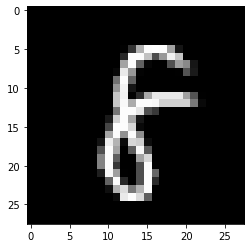

In [15]:
plot_image(x_train[456])
print(y_train[456])

In [17]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [19]:
x_train.shape 
 

(60000, 784)

In [20]:
x_test.shape

(10000, 784)

In [21]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test=to_categorical(y_test)

In [22]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Artifical Neural Networks 

In [16]:
from keras.models import Sequential
from keras.layers import Dense 

In [23]:
model = Sequential()#create empty architecture for NN
model.add(Dense(units=32,activation='relu',input_shape=(784,))) #first layer add #input layer 
model.add(Dense(units=64,activation='relu',))#no need to give shape 
model.add(Dense(units=128,activation='relu',))
model.add(Dense(units=32,activation='relu',))
model.add(Dense(units=10,activation='softmax',))#output layer #units=10 because we have {0-9} digits ie 10 predictions #multiple classes



In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 40,010
Trainable params: 40,010
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer= "adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [26]:
# train our model
model.fit(x = x_train, y= y_train, epochs= 10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.7400 - accuracy: 0.8176 - val_loss: 0.3073 - val_accuracy: 0.9146
Epoch 2/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.2717 - accuracy: 0.9248 - val_loss: 0.2247 - val_accuracy: 0.9362
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.2035 - accuracy: 0.9423 - val_loss: 0.1996 - val_accuracy: 0.9444
Epoch 4/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.1714 - accuracy: 0.9518 - val_loss: 0.1847 - val_accuracy: 0.9498
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1466 - accuracy: 0.9578 - val_loss: 0.1629 - val_accuracy: 0.9563
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1320 - accuracy: 0.9623 - val_loss: 0.1483 - val_accuracy: 0.9588
Epoch 7/10
60000/60000 [==============================] - 4s 60us/st

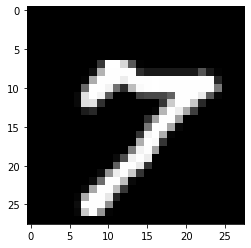

In [29]:
plot_image(x_test[9000])

In [30]:
model.predict_classes(x_test[9000].reshape(1, 784))

array([7])